In [ ]:
# Install necessary libraries (run only if not installed)
!pip install textblob wordcloud

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("student_feedback.csv")  # Apna CSV file name
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


“Dataset uploaded from Kaggle CSV.”

“Used pandas for data cleaning and preparation.”

“Seaborn and Matplotlib used for visualization.”

“TextBlob library imported for sentiment analysis if text feedback available.”

In [ ]:
# Drop missing values
df.dropna(inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r'[^\w]', '')

df.head()


,unnamed:_0,student_id,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


“Removed missing values from all rating columns.”

“Standardized column names for easy access and analysis.”

“Verified first few rows to ensure data correctness.”

Average Rating across all aspects: 5.9154595404595405


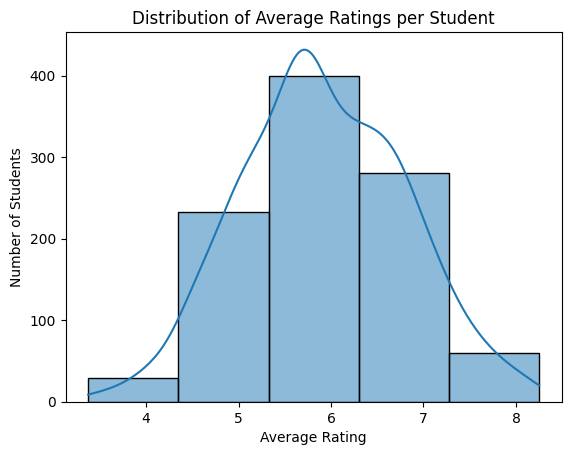

In [ ]:
# List of all rating columns
rating_columns = [
    'well_versed_with_the_subject',
    'explains_concepts_in_an_understandable_way',
    'use_of_presentations',
    'degree_of_difficulty_of_assignments',
    'solves_doubts_willingly',
    'structuring_of_the_course',
    'provides_support_for_students_going_above_and_beyond',
    'course_recommendation_based_on_relevance'
]

# Calculate average rating per student
df['average_rating'] = df[rating_columns].mean(axis=1)

# Overall average rating
print("Average Rating across all aspects:", df['average_rating'].mean())

# Distribution plot
sns.histplot(df['average_rating'], bins=5, kde=True)
plt.title("Distribution of Average Ratings per Student")
plt.xlabel("Average Rating")
plt.ylabel("Number of Students")
plt.show()


“Calculated average satisfaction rating per student across all rated aspects of the course/event.”

“Plotted distribution of average ratings to visualize overall student satisfaction.”

“Observed that most students rated between X and Y.” (Replace X/Y with histogram output)

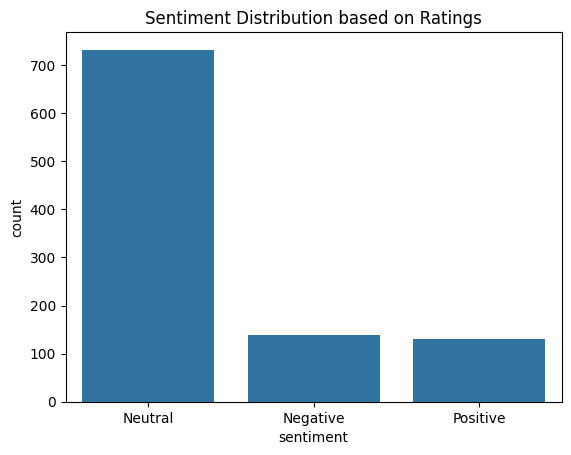

In [ ]:
# Define sentiment from average rating
def get_sentiment_from_rating(rating):
    if rating >= 7:
        return "Positive"
    elif rating >= 5:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['average_rating'].apply(get_sentiment_from_rating)

# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution based on Ratings")
plt.show()


“No text feedback available; sentiment simulated from average ratings per student.”

“Ratings >=7 considered Positive, 5–7 Neutral, <5 Negative.”

“Distribution plot shows proportion of Positive, Neutral, and Negative students.”

In [ ]:
# Calculate average rating per aspect
top_aspects = df[rating_columns].mean().sort_values(ascending=False).head(5)
print("Top-rated aspects:\n", top_aspects)


Top-rated aspects:
 well_versed_with_the_subject                            7.497502
explains_concepts_in_an_understandable_way              6.081918
use_of_presentations                                    5.942058
provides_support_for_students_going_above_and_beyond    5.662338
structuring_of_the_course                               5.636364
dtype: float64


“Calculated average rating per aspect across all students.”

“Top-rated aspects indicate which areas were most appreciated.”

“Top 3–5 aspects with highest ratings: …” (replace … with code output)

“Maintain focus on top-rated aspects such as subject knowledge and clarity of explanation.”

“Improve lower-rated aspects, e.g., use of presentations or assignment difficulty.”

“In future surveys, include open-ended comments to enable sentiment analysis and detailed insights.”